In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# Simple approach

A few assumptions
* The ESR of all caps is 10mΩ
* The trace resistance is 10mΩ in total
* FET turn on is absolutely synchronised

In [7]:
r_trace = 10e-3


v_bank = 12 #volts, voltage of the capacitor bank
c_bank = 2200e-6 * 20 #farads, 2.2mF * 20
r_bank = (10e-3 / 20) #Ω of the bank

r_fet_gate = 10 #Ω, gate resistance
r_fet_rds = 9e-3 #Ω, Rds resistance
v_fet_gate = 12 #volts, 
q_fet = 25e-9 #coulombs
num_fets = 10


In [8]:
e_bank = 0.5 * c_bank * v_bank**2 #joule energy in the capacitor bank
r_total = r_bank + r_trace + (r_fet_rds / num_fets)
i_max = v_bank / r_total
i_per_fet = i_max / num_fets
p_fet = (((i_per_fet) ** 2) * r_fet_rds) #per MOSFET power dissipation

print(f"Given the above parameters, a max current of {round(i_max)}A will flow, causing a power dissipation of {round(p_fet, 3)}W per MOSFET")

Given the above parameters, a max current of 1053A will flow, causing a power dissipation of 99.723W per MOSFET


## This is the transient thermal impedance
X axis is the pulse time in s
Y axis is thermal impedance, junction to case in C/W

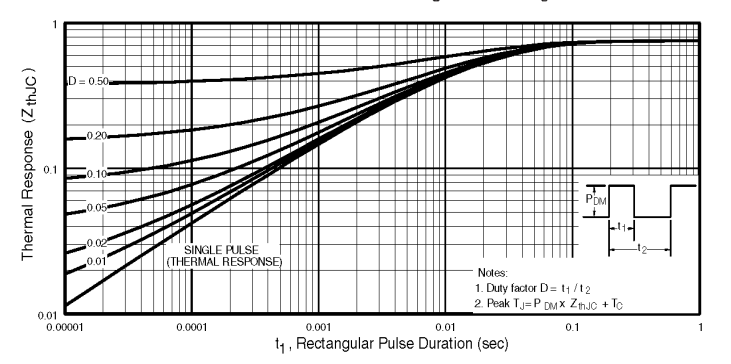

In [ ]:
# duty cycle, thermal resistance (C/W), pulse duration (s)
transient_thermal_resistance_array = [
    #10us
    (0.01, 0.02, 10e-6),
    (0.02, 0.03, 10e-6),
    (0.05, 0.045, 10e-6),
    (0.1, 0.09, 10e-6),
    (0.2, 0.18, 10e-6),
    (0.5, 0.4, 10e-6),

    #100us
    (0.01, 0.05, 100e-6),
    (0.02, 0.055, 100e-6),
    (0.05, 0.08, 100e-6),
    (0.1, 0.12, 100e-6),
    (0.2, 0.19, 100e-6),
    (0.5, 0.4, 100e-6),

    #1ms
    (0.01, 0.15, 1e-3),
    (0.02, 0.16, 1e-3),
    (0.05, 0.17, 1e-3),
    (0.1, 0.2, 1e-3),
    (0.2, 0.27, 1e-3),
    (0.5, 0.45, 1e-3),

    #10ms
    (0.01, 0.45, 10e-3),
    (0.02, 0.46, 10e-3),
    (0.05, 0.47, 10e-3),
    (0.1, 0.48, 10e-3),
    (0.2, 0.5, 10e-3),
    (0.5, 0.6, 10e-3),

    #100ms
    (0.01, 0.75, 100e-3),
    (0.02, 0.75, 100e-3),
    (0.05, 0.75, 100e-3),
    (0.1, 0.75, 100e-3),
    (0.2, 0.75, 100e-3),
    (0.5, 0.75, 100e-3),

    #fully on
    # (0.99, 40, 100e-3)
]

In [16]:
duty = [i[0] for i in transient_thermal_resistance_array]
Zth = [i[1] for i in transient_thermal_resistance_array]
pulse = [i[2] for i in transient_thermal_resistance_array]

In [17]:
points = np.array([(i) for i in zip(duty, pulse)])
values =  np.array(Zth)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(points)

model = LinearRegression()
model.fit(X_poly, values)

pred = model.predict(X_poly)

print(f"Coeff : {model.coef_}")
print(f"Intercept : {model.intercept_}")
r2 = r2_score(values, pred)
r2
print(pred)
print(points)

Coeff : [   0.          -31.48969761   26.06616514   61.86506466   75.43317088
 -284.14642931]
Intercept : 1.649194296063505
[ 1.340752    1.04442209  0.22967043 -0.88078875 -2.17373114  1.37124945
  1.34316303  1.04690101  0.23235302 -0.87776671 -2.1700302   1.37698709
  1.36702018  1.07143705  0.25892575 -0.84779948 -2.13327399  1.43411026
  1.58027415  1.29148001  0.49933567 -0.57344464 -1.79102929  1.98002452
  1.18106922  0.96016493  0.37169015 -0.36164089 -0.900327    4.90742242
 38.34137967]
[[1.0e-02 1.0e-05]
 [2.0e-02 1.0e-05]
 [5.0e-02 1.0e-05]
 [1.0e-01 1.0e-05]
 [2.0e-01 1.0e-05]
 [5.0e-01 1.0e-05]
 [1.0e-02 1.0e-04]
 [2.0e-02 1.0e-04]
 [5.0e-02 1.0e-04]
 [1.0e-01 1.0e-04]
 [2.0e-01 1.0e-04]
 [5.0e-01 1.0e-04]
 [1.0e-02 1.0e-03]
 [2.0e-02 1.0e-03]
 [5.0e-02 1.0e-03]
 [1.0e-01 1.0e-03]
 [2.0e-01 1.0e-03]
 [5.0e-01 1.0e-03]
 [1.0e-02 1.0e-02]
 [2.0e-02 1.0e-02]
 [5.0e-02 1.0e-02]
 [1.0e-01 1.0e-02]
 [2.0e-01 1.0e-02]
 [5.0e-01 1.0e-02]
 [1.0e-02 1.0e-01]
 [2.0e-02 1.0e-01]
 [